In [1]:
pip install lime


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the uploaded dataset
file_path = "ICI_groups1and2.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,Unnamed: 1,Round 1:,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124
0,NaN,NaN,NaN,T_CRmax,T_CLmax,T̅_CR,T̅_CL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SubjectID,NaN,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,...,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,Cosmetics,Time,Date
2,161117-1,NaN,-0.27,34.94,35.48,34.05,34.74,34.92,34.92,34.71,...,36.59,Male,41-50,White,24,28,0.8,NaN,12:43:46,16-11-17
3,161117-2,NaN,-0.21,33.56,34.93,33.23,34.14,34.80,33.97,34.80,...,37.19,Female,31-40,Black or African-American,24,26,0.8,NaN,15:22:48,16-11-17
4,161117-3,NaN,-0.28,35.91,35.60,35.46,34.71,35.83,35.83,35.50,...,37.34,Female,21-30,White,24,26,0.8,NaN,15:52:56,16-11-17


In [5]:
# Use row 1 as header and reload the data
df = pd.read_csv(file_path, header=1)

# Drop the first two rows (index 0 and 1 in original, now 0 after header shift) if they are still non-data rows
df = df[1:].reset_index(drop=True)

# Drop columns with all NaN or unnamed columns that aren't useful
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display basic info and first few cleaned rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 56 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   T_CRmax    956 non-null    object
 1   T_CLmax    956 non-null    object
 2   T̅_CR      956 non-null    object
 3   T̅_CL      956 non-null    object
 4   T_CEmax    955 non-null    object
 5   T_FC       955 non-null    object
 6   T_FR       955 non-null    object
 7   T_FL       955 non-null    object
 8   T_FB       955 non-null    object
 9   T_FT       955 non-null    object
 10  T_FEmax    955 non-null    object
 11  T_FCmax    955 non-null    object
 12  T_max      955 non-null    object
 13  T_Mmax     955 non-null    object
 14  T_CRmax.1  879 non-null    object
 15  T_CLmax.1  879 non-null    object
 16  T̅_CR.1    879 non-null    object
 17  T̅_CL.1    879 non-null    object
 18  T_CEmax.1  878 non-null    object
 19  T_FC.1     879 non-null    object
 20  T_FR.1     879 non-null    obj

(None,
   T_CRmax T_CLmax  T̅_CR  T̅_CL T_CEmax   T_FC   T_FR   T_FL   T_FB   T_FT  \
 0   34.94   35.48  34.05  34.74   35.48  33.06  32.86  32.81  32.97  32.23   
 1   33.56   34.93  33.23  34.14   34.96  33.52  33.01  32.85  33.56  33.34   
 2   35.91   35.60  35.46  34.71   35.91  34.70  34.80  34.37  34.72  34.70   
 3   35.25   35.46  33.78  33.88   35.64  34.10  34.36  34.64  33.67  34.55   
 4   35.57   35.78  34.38  35.27   35.78  34.70  34.86  33.98  34.45  34.85   
 
    ... T_CEmax.3 T_FC.3 T_FR.3 T_FL.3 T_FB.3 T_FT.3 T_FEmax.3 T_FCmax.3  \
 0  ...     35.51  33.31  33.18  32.97  33.22  32.65     34.10     33.73   
 1  ...     34.79  33.65  33.86  33.44  33.67  33.52     34.36     34.17   
 2  ...     35.92  34.69  34.60  34.57  34.59  34.85     35.21     35.16   
 3  ...     35.88  33.75  33.97  34.21  33.97  34.07     35.27     34.34   
 4  ...     35.85  35.01  35.09  34.61  34.46  35.13     35.45     35.45   
 
   T_max.3 T_Mmax.3  
 0   36.39    36.39  
 1   36.30    3

In [11]:
print(df_full.columns.tolist())


['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'T_CRmax', 'T_CLmax', 'T̅_CR', 'T̅_CL', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'T_CEmax', 'Unnamed: 18', 'T_FC', 'T_FR', 'T_FL', 'T_FB', 'T_FT', 'T_FEmax', 'T_FCmax', 'T_max', 'Unnamed: 27', 'T_Mmax', 'Unnamed: 29', 'Unnamed: 30', 'T_CRmax.1', 'T_CLmax.1', 'T̅_CR.1', 'T̅_CL.1', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'T_CEmax.1', 'Unnamed: 46', 'T_FC.1', 'T_FR.1', 'T_FL.1', 'T_FB.1', 'T_FT.1', 'T_FEmax.1', 'T_FCmax.1', 'T_max.1', 'Unnamed: 55', 'T_Mmax.1', 'Unnamed: 57', 'Unnamed: 58', 'T_CRmax.2', 'T_CLmax.2', 'T̅_CR.2', 'T̅_CL.2', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'T_CEmax.2', 'Unnamed: 74', 'T_FC.2', 'T_FR.2', 'T

In [15]:
gender_series = df_full['T̅_CR'].iloc[1:].reset_index(drop=True)


In [19]:
df = pd.read_csv(file_path, header=2)


In [22]:
print(df.columns.tolist())


['SubjectID', 'Unnamed: 1', 'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'Unnamed: 29', 'T_offset2', 'Max1R13_2', 'Max1L13_2', 'aveAllR13_2', 'aveAllL13_2', 'T_RC2', 'T_RC_Dry2', 'T_RC_Wet2', 'T_RC_Max2', 'T_LC2', 'T_LC_Dry2', 'T_LC_Wet2', 'T_LC_Max2', 'RCC2', 'LCC2', 'canthiMax2', 'canthi4Max2', 'T_FHCC2', 'T_FHRC2', 'T_FHLC2', 'T_FHBC2', 'T_FHTC2', 'T_FH_Max2', 'T_FHC_Max2', 'T_Max2', 'T_OR2', 'T_OR_Max2', 'Unnamed: 57', 'T_offset3', 'Max1R13_3', 'Max1L13_3', 'aveAllR13_3', 'aveAllL13_3', 'T_RC3', 'T_RC_Dry3', 'T_RC_Wet3', 'T_RC_Max3', 'T_LC3', 'T_LC_Dry3', 'T_LC_Wet3', 'T_LC_Max3', 'RCC3', 'LCC3', 'canthiMax3', 'canthi4Max3', 'T_FHCC3', 'T_FHRC3', 'T_FHLC3', 'T_FHBC3', 'T_FHTC3', 'T_FH_Max3', 'T_FHC_Max3', 'T

In [26]:
# Drop constant columns (zero standard deviation) that break LIME
constant_cols = X.columns[X.std() == 0]
X = X.drop(columns=constant_cols)


In [28]:
# Convert all features to numeric (if not already)
X = X.apply(pd.to_numeric, errors='coerce')

# Ensure no NaNs remain
X = X.fillna(X.mean())


In [30]:
# Convert all features to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Fill NaNs with column means
X = X.fillna(X.mean())

# Drop constant columns that cause issues in LIME
constant_cols = X.columns[X.std() == 0]
X = X.drop(columns=constant_cols)


In [34]:
X = X.loc[:, X.std() != 0]


In [36]:
# Replace inf values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaNs with column mean
X.fillna(X.mean(), inplace=True)

# Drop remaining NaNs if any
X.dropna(axis=1, inplace=True)


In [38]:
# Ensure test set has same columns
X_test = X_test[X.columns]


In [44]:
import lime
import lime.lime_tabular


In [48]:
# Check for NaNs
print("NaNs in training data:", X_train.isnull().sum().sum())

# Option 1: Fill NaNs (e.g., with mean)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use training mean to avoid leakage

# Option 2: Drop rows with NaNs
# X_train = X_train.dropna()
# X_test = X_test.dropna()


NaNs in training data: 1024


In [126]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # or X_train.values, both work
    feature_names=X_train.columns.tolist(),  # convert Index to list explicitly
    class_names=['Class 0', 'Class 1'],
    mode='classification',
    discretize_continuous=False  # avoids sampling errors
)


In [56]:
# Replace inf with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Fill NaNs with column mean (safe default)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # use train mean for test data


In [68]:
# Identify missing columns
missing_cols = [col for col in X_train.columns if col not in X_test.columns]

# Create a DataFrame with those columns filled with 0
missing_df = pd.DataFrame(0, index=X_test.index, columns=missing_cols)

# Concatenate X_test with missing columns
X_test = pd.concat([X_test, missing_df], axis=1)

# Reorder columns to match X_train
X_test = X_test[X_train.columns]


In [80]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X_train.columns,
    class_names=['Class 0', 'Class 1'],
    mode='classification',
    discretize_continuous=False  # This avoids the problematic discretizer
)


In [74]:
import numpy as np
import pandas as pd

# Replace inf/-inf with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Drop columns that are completely NaN (if any)
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test[X_train.columns]  # Keep same columns as train

# Fill remaining NaNs with column means
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use train means for consistency

# Identify and drop constant columns (zero variance)
constant_columns = X_train.loc[:, X_train.std() == 0].columns
X_train = X_train.drop(columns=constant_columns)
X_test = X_test.drop(columns=constant_columns)

# Now scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [76]:
print("Columns with NaNs after cleanup:", X_train.columns[X_train.isna().any()])
print("Columns with zero variance:", X_train.columns[X_train.std() == 0])


Columns with NaNs after cleanup: Index([], dtype='object')
Columns with zero variance: Index([], dtype='object')


In [86]:
# 1. Identify non-constant features
non_constant_columns = X_train.loc[:, X_train.std() > 0].columns

# 2. Scale and filter
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[non_constant_columns]), columns=non_constant_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[non_constant_columns]), columns=non_constant_columns)

# 3. Retrain model using the reduced feature set
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [92]:
# Just scale all features without dropping any
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Replace NaNs or infs (if any)
X_train_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_scaled.fillna(X_train_scaled.mean(), inplace=True)
X_test_scaled.fillna(X_train_scaled.mean(), inplace=True)

# Use these in LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled.values,
    feature_names=X_train_scaled.columns.tolist(),
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)


In [90]:
# 1. Drop columns with zero variance
X_train = X_train.loc[:, X_train.std() > 0]
X_test = X_test[X_train.columns]  # match columns

# 2. Handle inf/nan values before scaling
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

# 3. Then scale
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [ ]:
#classification





In [94]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Clean your data
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
X_test = X_test[X_train.columns]  # ensure same columns

# 2. Scale
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 3. Drop zero-variance columns (important for LIME!)
non_constant_columns = X_train_scaled.loc[:, X_train_scaled.std() > 0].columns
X_train_scaled = X_train_scaled[non_constant_columns]
X_test_scaled = X_test_scaled[non_constant_columns]

# 4. Now initialize LIME with only non-constant features
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled.values,
    feature_names=non_constant_columns,
    class_names=['Class 0', 'Class 1'],  # use your actual class names if available
    mode='classification'
)

# 5. Explain an instance
idx = 1
exp = explainer.explain_instance(
    X_test_scaled.iloc[idx].values,
    model.predict_proba,
    num_features=10
)
exp.show_in_notebook(show_table=True, show_all=False)


C:\Users\yashw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [100]:
!pip install lime scikit-learn pandas matplotlib seaborn

In [114]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,  # No .values if it's already a NumPy array
    feature_names=feature_names,  # Should match columns of X
    class_names=['Class 0', 'Class 1'],
    mode='classification',
    discretize_continuous=False
)


In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import lime
import lime.lime_tabular

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Replace with your dataset
# For example purposes, let's simulate a dataset:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Split features and target
X = df.drop('target', axis=1)
y = df['target']
feature_names = X.columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create LIME explainer with discretization enabled (avoids scale errors)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],
    mode='classification',
    discretize_continuous=True  # Prevents scale errors
)

# Choose a test instance to explain
idx = 1
instance_to_explain = X_test_scaled[idx]

# Explain prediction
exp = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=model.predict_proba,
    num_features=10
)




Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [1]:
#regression




In [15]:
# Check and fix column names
df = pd.read_csv("ICI_groups1and2.csv")

# Option 1: If there's an unnecessary index column, drop it
if df.columns[0].lower().startswith('unnamed'):
    df.drop(columns=df.columns[0], inplace=True)

# Now assign proper feature and target separation
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [17]:
# Example: Rename all columns to Feature_0, Feature_1, ..., Feature_n
df.columns = [f'Feature_{i}' for i in range(df.shape[1])]


In [45]:
print(df.columns.tolist())


['Unnamed: 0', 'Unnamed: 1', 'Round 1:', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Round 2:', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Round 3:', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67

In [47]:
df.columns = df.columns.str.strip()


In [49]:
print(df.columns.tolist())


['Unnamed: 0', 'Unnamed: 1', 'Round 1:', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Round 2:', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Round 3:', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67

In [51]:
# Try skipping the first 2-3 rows (adjust as needed)
df = pd.read_csv("ICI_groups1and2.csv", skiprows=2)

# Preview the top few rows
print(df.head())
print(df.columns.tolist())


  SubjectID  Unnamed: 1  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0  161117-1         NaN      -0.27      34.94      35.48        34.05   
1  161117-2         NaN      -0.21      33.56      34.93        33.23   
2  161117-3         NaN      -0.28      35.91      35.60        35.46   
3  161117-4         NaN      -0.32      35.25      35.46        33.78   
4  161117-5         NaN      -0.52      35.57      35.78        34.38   

   aveAllL13_1  T_RC1  T_RC_Dry1  T_RC_Wet1  ...  aveOralM  Gender    Age  \
0        34.74  34.92      34.92      34.71  ...     36.59    Male  41-50   
1        34.14  34.80      33.97      34.80  ...     37.19  Female  31-40   
2        34.71  35.83      35.83      35.50  ...     37.34  Female  21-30   
3        33.88  35.24      35.20      35.22  ...     37.09  Female  21-30   
4        35.27  35.60      35.54      35.60  ...     37.04    Male  18-20   

                   Ethnicity  T_atm  Humidity  Distance  Cosmetics      Time  \
0                 

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Load and clean data
df = pd.read_csv("ICI_groups1and2.csv", skiprows=2)

# 2. Drop rows where target is missing
df = df.dropna(subset=['aveOralF'])

# 3. Drop irrelevant or problematic columns
df = df.drop(columns=['SubjectID', 'Unnamed: 1', 'Time', 'Date', 'Cosmetics'])

# 4. Separate features and target
X = df.drop(columns=['aveOralF'])
y = df['aveOralF']

# 5. Handle categorical features (e.g., one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# 6. Replace infinite and NaN values
# 1. Replace infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. Drop columns where all values are NaN
X.dropna(axis=1, how='all', inplace=True)

# 3. Fill any remaining NaNs with column means
X.fillna(X.mean(), inplace=True)

# 4. Optional: drop rows with any remaining NaNs
X.dropna(axis=0, inplace=True)
y = y[X.index]  # Keep target in sync

# 7. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Train a model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 10. Evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.029656480198019718


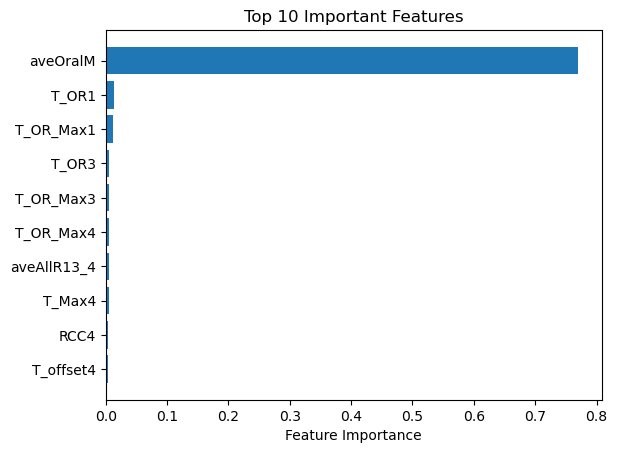

In [55]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show()


In [63]:
def check_data_integrity(X, y):
    print("\n=== Data Integrity Check ===")
    print(f"Shape of features (X): {X.shape}")
    print(f"Shape of target (y): {y.shape}")
    
    # Select only numeric columns
    numeric_X = X.select_dtypes(include=[np.number])
    
    # Check for NaNs and Infs
    nan_count = numeric_X.isna().sum().sum()
    inf_count = np.isinf(numeric_X.to_numpy()).sum()
    
    if nan_count > 0:
        print(f" Warning: {nan_count} NaN values detected in numeric features.")
    if inf_count > 0:
        print(f" Warning: {inf_count} Inf/-Inf values detected in numeric features.")
    
    if nan_count == 0 and inf_count == 0:
        print(" Data looks clean! Ready for training.")
    else:
        print(" Please fix missing/infinite values before training.")


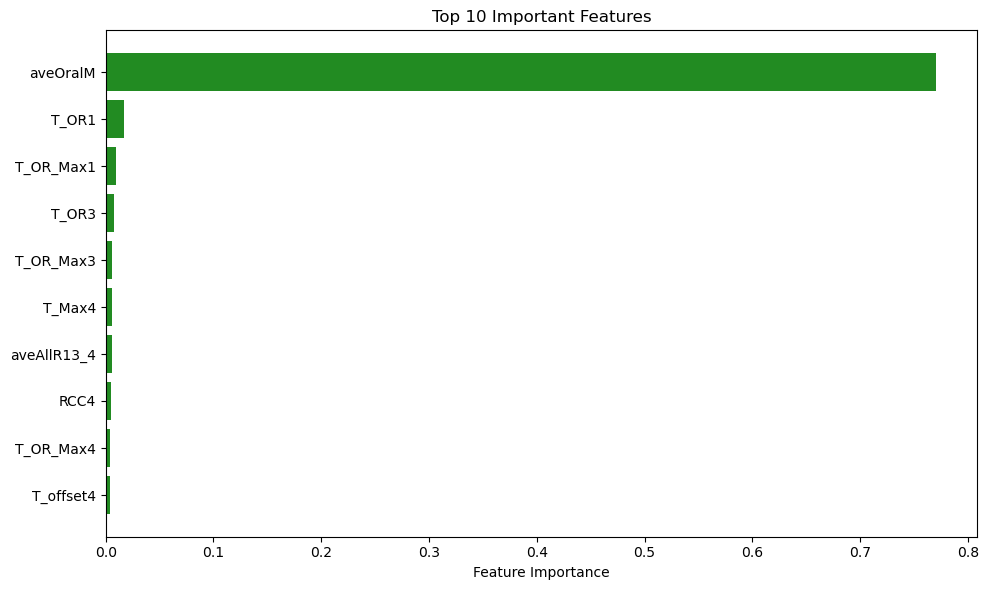

In [71]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-10:]  # Top 10 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='forestgreen')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()


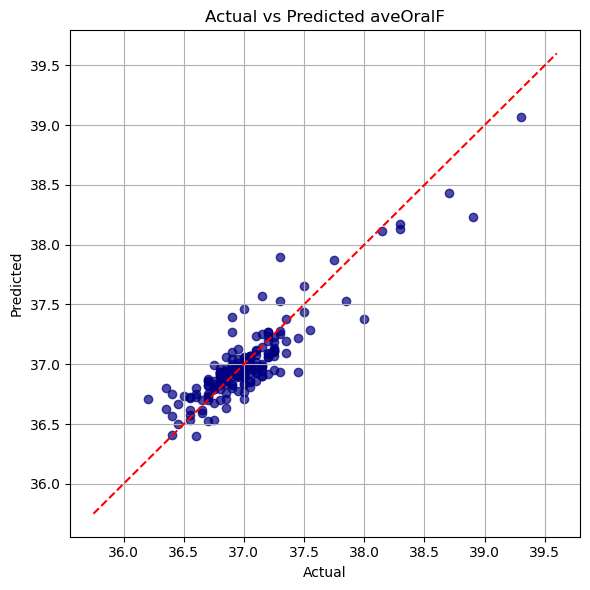

In [73]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='navy')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted aveOralF")
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
# Load data correctly
df = pd.read_csv("ICI_groups1and2.csv", skiprows=2)

# Check what columns are in the data
print("\n Columns in Data:")
print(df.columns.tolist())

# See how many missing values in target
target_column = "aveOralM"
print(f"\n Missing values in target ({target_column}):")
print(df[target_column].isna().sum())

# See how many total rows are valid after dropping NaNs
df[target_column] = pd.to_numeric(df[target_column], errors='coerce')
df_numeric = df.select_dtypes(include=[np.number])
X = df_numeric.drop(columns=[target_column], errors='ignore')
y = df[target_column]
data = pd.concat([X, y], axis=1)
print("\n Shape before dropna:", data.shape)
data = data.dropna()
print(" Shape after dropna:", data.shape)



 Columns in Data:
['SubjectID', 'Unnamed: 1', 'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'Unnamed: 29', 'T_offset2', 'Max1R13_2', 'Max1L13_2', 'aveAllR13_2', 'aveAllL13_2', 'T_RC2', 'T_RC_Dry2', 'T_RC_Wet2', 'T_RC_Max2', 'T_LC2', 'T_LC_Dry2', 'T_LC_Wet2', 'T_LC_Max2', 'RCC2', 'LCC2', 'canthiMax2', 'canthi4Max2', 'T_FHCC2', 'T_FHRC2', 'T_FHLC2', 'T_FHBC2', 'T_FHTC2', 'T_FH_Max2', 'T_FHC_Max2', 'T_Max2', 'T_OR2', 'T_OR_Max2', 'Unnamed: 57', 'T_offset3', 'Max1R13_3', 'Max1L13_3', 'aveAllR13_3', 'aveAllL13_3', 'T_RC3', 'T_RC_Dry3', 'T_RC_Wet3', 'T_RC_Max3', 'T_LC3', 'T_LC_Dry3', 'T_LC_Wet3', 'T_LC_Max3', 'RCC3', 'LCC3', 'canthiMax3', 'canthi4Max3', 'T_FHCC3', 'T_FHRC3', 'T_FHLC3', 'T_FHBC3', 'T_FHTC3', 'T_FH_Max3

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load data (skip the first 2 messy rows)
df = pd.read_csv("ICI_groups1and2.csv", skiprows=2)

# 2. Set target column
target_column = "aveOralM"
df[target_column] = pd.to_numeric(df[target_column], errors="coerce")

# 3. Numeric features
df_numeric = df.select_dtypes(include=[np.number])

# 4. Drop features with >10% missing
threshold = 0.1
valid_feature_cols = df_numeric.columns[df_numeric.isnull().mean() < threshold]
valid_feature_cols = valid_feature_cols.drop(target_column, errors="ignore")

# 5. Prepare feature matrix and target
X = df_numeric[valid_feature_cols]
y = df[target_column]

# 6. Combine and drop rows with NaNs
data = pd.concat([X, y], axis=1).dropna()
X = data[valid_feature_cols]
y = data[target_column]

# 7. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 8. Linear Regression ===
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print(" Linear Regression")
print("R² Score:", r2_score(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

# === 9. Random Forest Regressor ===
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("\n Random Forest Regression")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


 Linear Regression
R² Score: 0.8694342720057583
RMSE: 0.20019136529352863

 Random Forest Regression
R² Score: 0.8453173970023434
RMSE: 0.21789711494809536


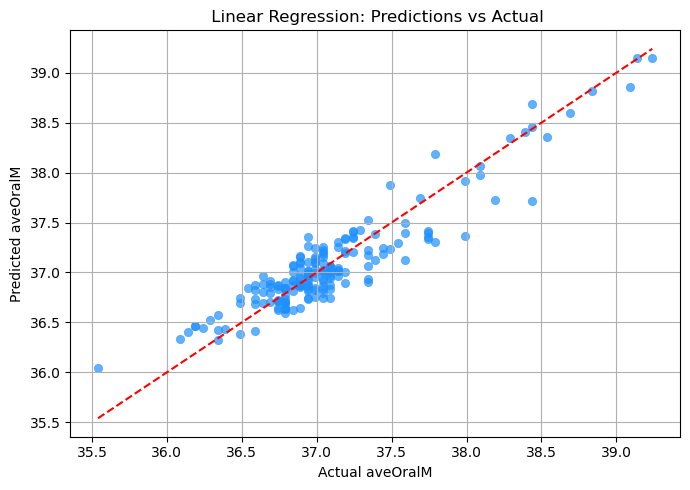

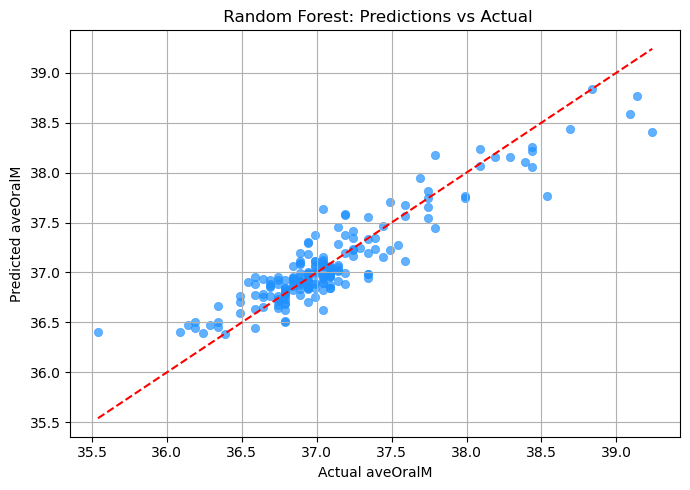

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to plot predictions vs. actual
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', alpha=0.7, edgecolor=None)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
    plt.xlabel("Actual aveOralM")
    plt.ylabel("Predicted aveOralM")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Visualize Linear Regression
plot_predictions(y_test, y_pred_lin, " Linear Regression: Predictions vs Actual")

# Visualize Random Forest Regression
plot_predictions(y_test, y_pred_rf, " Random Forest: Predictions vs Actual")


In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Clean your data
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
X_test = X_test[X_train.columns]  # ensure same columns

# 2. Scale
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 3. Drop zero-variance columns (important for LIME!)
non_constant_columns = X_train_scaled.loc[:, X_train_scaled.std() > 0].columns
X_train_scaled = X_train_scaled[non_constant_columns]
X_test_scaled = X_test_scaled[non_constant_columns]

# 4. Now initialize LIME for regression
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled.values,
    feature_names=non_constant_columns,
    mode='regression'  # Changed from 'classification' to 'regression'
)

# 5. Explain an instance
idx = 1
exp = explainer.explain_instance(
    X_test_scaled.iloc[idx].values,
    model.predict,  # Changed from predict_proba to predict for regression
    num_features=10
)
exp.show_in_notebook(show_table=True, show_all=False)

C:\Users\yashw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [123]:
print(X_train.isnull().all().all())  # True if all values are NaN
print(X_train.notnull().sum().sum())  # Count of non-missing values

False
23584


In [125]:
print(X_train.dtypes)

T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
aveOralF       float64
T_atm          float64
Humidity       float64
Distance       float64
Cosmetics      float64
dtype: object


In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import preprocessing

# Load and clean dataset (Assuming previous cleaning steps)
df = pd.read_csv("ICI_groups1and2.csv", skiprows=1)
df = df.dropna(axis=1, how="all")
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Replace with actual target column after printing df.columns
target_column = "SubjectID"

# Ensure correct target column
if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found. Available columns: {df.columns}")

# Convert categorical data to numerical (if necessary)
df = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Split dataset
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [171]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- canthiMax3 <= 0.50
|   |--- class: 169
|--- canthiMax3 >  0.50
|   |--- T_offset2 <= 0.50
|   |   |--- T_RC1 <= 68.50
|   |   |   |--- class: 372
|   |   |--- T_RC1 >  68.50
|   |   |   |--- RCC1 <= 125.50
|   |   |   |   |--- class: 414
|   |   |   |--- RCC1 >  125.50
|   |   |   |   |--- class: 87
|   |--- T_offset2 >  0.50
|   |   |--- T_atm <= 1.50
|   |   |   |--- class: 387
|   |   |--- T_atm >  1.50
|   |   |   |--- RCC4 <= 3.00
|   |   |   |   |--- class: 458
|   |   |   |--- RCC4 >  3.00
|   |   |   |   |--- class: 0



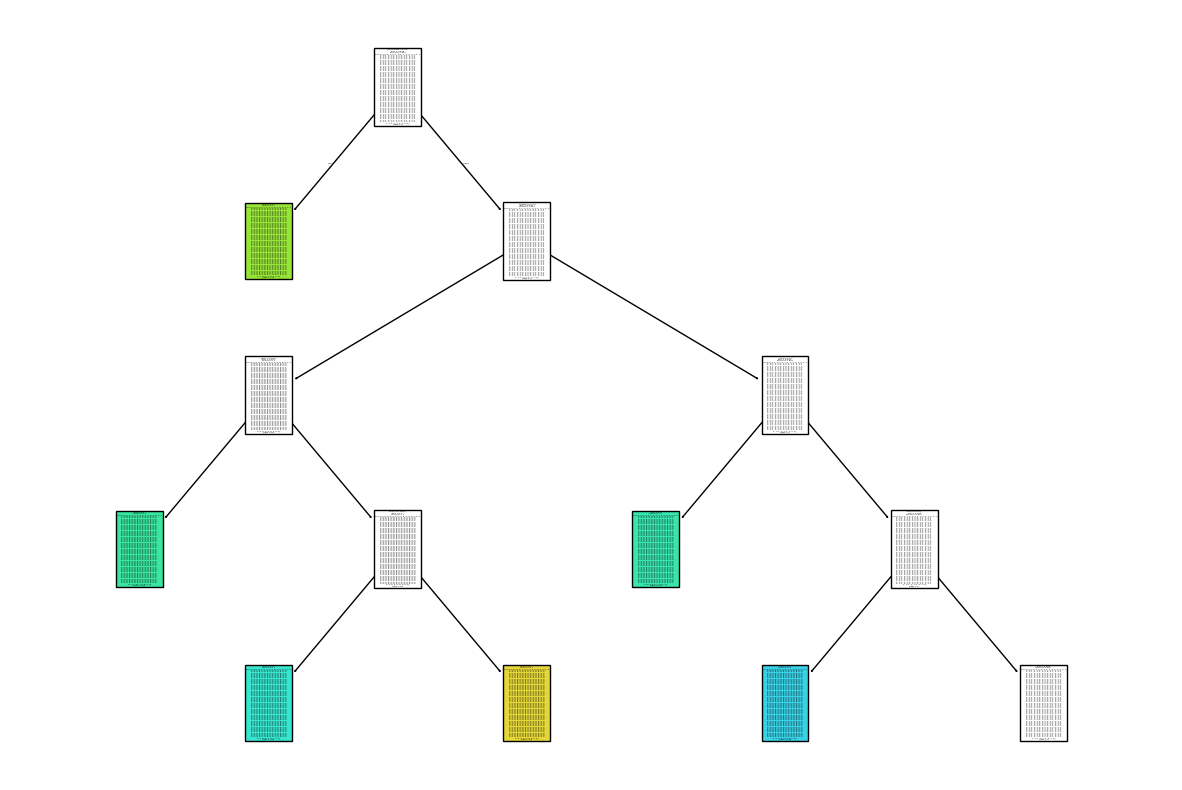

In [173]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True)

plt.show()

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing  # Example dataset

In [177]:
# Load dataset (example: California Housing dataset)
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names  # Feature names for reference

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Initialize and train the Decision Tree model
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

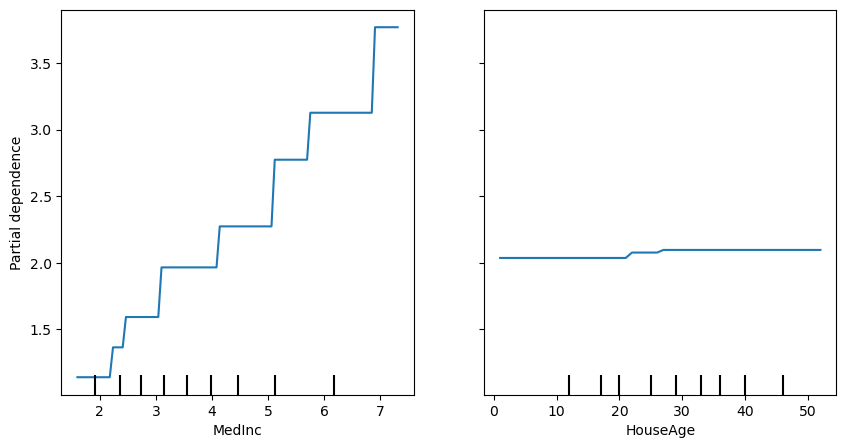

In [181]:
# Select features for PDP visualization
features_to_plot = [0, 1]  # Example: Feature indices (replace with actual feature indices)

# Create PDP plot
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(tree_regressor, X_train, features_to_plot,
                                        feature_names=feature_names, ax=ax)
plt.show()


In [183]:
#The x-axis represents the feature values.

#The y-axis represents the predicted output.

#The PDP curve shows how changes in the selected feature impact the prediction, marginalizing over all other features.

In [185]:
pip install shap scikit-learn matplotlib pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [187]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [189]:
# Sample dataset with mixed data types
data = pd.DataFrame({
    'numerical_1': np.random.rand(1000),       # Continuous Feature
    'numerical_2': np.random.rand(1000) * 50,  # Continuous Feature
    'categorical': np.random.choice(['A', 'B', 'C'], 1000),  # Categorical Feature
    'target': np.random.rand(1000) * 100       # Target Variable
})

# Define features and target
X = data.drop(columns=['target'])
y = data['target']

# Identify feature types
num_features = ['numerical_1', 'numerical_2']
cat_features = ['categorical']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [191]:
# Define and train model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['numerical_1',
                                                   'numerical_2']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['categorical'])])),
                ('regressor', RandomForestRegressor(random_state=42))])